<a href="https://colab.research.google.com/github/khanabdulmajid/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,UpSampling2D,Conv2D,Reshape,Conv2DTranspose
from numpy.random import rand

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 25)                75        
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


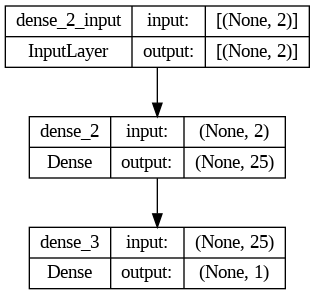

In [13]:
def define_descriminator(n_inputs=2):
  model= Sequential()
  model.add(Dense(25,input_dim=n_inputs,activation='relu',
                  kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

model = define_descriminator()
model.summary()
plot_model(model,
           to_file ='discriminator_plot.png',
           show_shapes=True,show_layer_names=True)

In [27]:
def generate_real_samples(n):
  X1 = rand(n)-0.5
  X2 = X1*X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  y = np.ones((n,1))
  return X,y

def generate_fake_samples(n):
  X1 = -1 + rand(n)*2
  X2 = -1 + rand(n)*2
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)

  X = np.hstack((X1,X2))
  y = np.zeros((n,1))
  return X,y


In [28]:
def train_discriminator(model,n_epochs=1000,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    # train discriminator on real samples
    X_real,y_real = generate_real_samples(half_batch)
    model.train_on_batch(X_real,y_real)

    # train discriminator on fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    model.train_on_batch(X_fake, y_fake)

    #evaluate the model
    _,acc_real = model.evaluate(X_real,y_real,verbose=0)
    _,acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i,acc_real, acc_fake)

In [29]:
model= define_descriminator()
train_discriminator(model)

0 0.0 1.0
1 0.0 1.0
2 0.015625 1.0
3 0.015625 1.0
4 0.015625 1.0
5 0.015625 1.0
6 0.046875 1.0
7 0.03125 1.0
8 0.03125 1.0
9 0.015625 1.0
10 0.09375 1.0
11 0.0625 1.0
12 0.015625 1.0
13 0.015625 1.0
14 0.03125 1.0
15 0.03125 1.0
16 0.015625 1.0
17 0.046875 1.0
18 0.03125 1.0
19 0.0625 1.0
20 0.0625 1.0
21 0.125 1.0
22 0.046875 1.0
23 0.046875 0.984375
24 0.078125 1.0
25 0.125 1.0
26 0.046875 1.0
27 0.09375 1.0
28 0.109375 1.0
29 0.09375 1.0
30 0.078125 1.0
31 0.046875 1.0
32 0.15625 1.0
33 0.09375 1.0
34 0.21875 1.0
35 0.125 1.0
36 0.09375 1.0
37 0.140625 0.984375
38 0.078125 1.0
39 0.21875 1.0
40 0.078125 1.0
41 0.15625 1.0
42 0.125 1.0
43 0.078125 1.0
44 0.09375 0.984375
45 0.15625 0.984375
46 0.203125 1.0
47 0.140625 1.0
48 0.125 1.0
49 0.109375 0.984375
50 0.09375 1.0
51 0.125 1.0
52 0.1875 1.0
53 0.265625 1.0
54 0.1875 1.0
55 0.21875 1.0
56 0.15625 0.984375
57 0.1875 1.0
58 0.0625 0.984375
59 0.140625 0.984375
60 0.203125 0.984375
61 0.15625 1.0
62 0.25 0.96875
63 0.21875 1.0
64 0

#Now we define the `Generator`

In [31]:
# 15 dense layers 2 output layers
def define_generator(latent_dim,n_outputs=2):
  model= Sequential()
  model.add(Dense(15,activation="relu", kernel_initializer="he_uniform",
                  input_dim=latent_dim))
  model.add(Dense(n_outputs))
  return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                75        
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


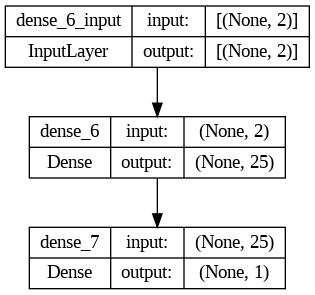

In [33]:
gen_model = define_generator(5)
model.summary()
plot_model(model, to_file="genrator_model.png", show_shapes=True, show_layer_names=True)